In [2]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import random
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
sample = pd.read_csv('./submit_sample.csv')

In [3]:
device ='cuda' if torch.cuda.is_available() else 'cpu'

random.seed(777)
torch.manual_seed(777)
if device == 'cuda' :
  torch.cuda.manual_seed_all(777)

device

'cuda'

In [4]:
train

,index,Timestamp,n-payments-per-block,miners-revenue,trade-volume,avg-block-size,n-unique-addresses,difficulty,hash-rate
0,328,9/25/2019 0:00,3714,0.166294,0.147157,1.104534,0.407111,1190,90.858160
1,523,4/7/2020 0:00,3302,0.146596,0.060107,1.137403,0.364428,1390,104.430894
2,1086,10/22/2021 0:00,4256,0.775290,0.281810,1.168189,0.613513,2010,146.706532
3,215,6/4/2019 0:00,4677,0.163721,0.051685,1.253258,0.587934,746,51.200279
4,256,7/15/2019 0:00,4278,0.198286,0.043616,1.136104,0.429397,906,64.994549
...,...,...,...,...,...,...,...,...,...
864,330,9/27/2019 0:00,3955,0.120062,0.082400,1.095424,0.345911,1280,91.434682
865,466,2/10/2020 0:00,3818,0.145750,0.025907,1.199867,0.515415,1550,110.381153
866,121,3/2/2019 0:00,3905,0.025145,0.041302,1.155579,0.266085,607,44.696377
867,1044,9/10/2021 0:00,4515,0.464794,0.091534,1.194476,0.465419,1840,135.548079


In [5]:
x_train = train.drop(['index','Timestamp','hash-rate'],axis=1)
x_test = test.drop(['index','Timestamp'],axis=1)
y_train = train['hash-rate']

In [6]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#x_train = sc.fit_transform(x_train)
#x_test = sc.transform(x_test)

#y_train = sc.fit_transform(y_train)

In [7]:
x_train = torch.FloatTensor(x_train.to_numpy()).to(device)
x_test = torch.FloatTensor(x_test.to_numpy()).to(device)
y_train = torch.FloatTensor(y_train.to_numpy()).reshape(-1,1).to(device)

In [8]:
x_train.shape,y_train.shape

(torch.Size([869, 6]), torch.Size([869, 1]))

In [9]:
class NN(torch.nn.Module):
    def __init__(self):
        super(NN,self).__init__()
        
        self.linear1 = nn.Linear(6,512,bias=True)
        self.linear2 = nn.Linear(512,256,bias=True)
        self.linear3 = nn.Linear(256,128,bias=True)
        self.linear4 = nn.Linear(128,64,bias=True)
        self.linear5 = nn.Linear(64,32,bias=True)
        self.linear6 = nn.Linear(32,1,bias=True)
        self.relu = nn.ReLU()
        #self.dropout = nn.Dropout(p=0.1)
        #init
        
        torch.nn.init.orthogonal_(self.linear1.weight)
        torch.nn.init.orthogonal_(self.linear2.weight)
        torch.nn.init.orthogonal_(self.linear3.weight)
        torch.nn.init.orthogonal_(self.linear4.weight)
        torch.nn.init.orthogonal_(self.linear5.weight)
        torch.nn.init.orthogonal_(self.linear6.weight)
        
    def forward(self,x):
        out = self.linear1(x)
        out = self.relu(out)
        #out = self.dropout(out)
        out = self.linear2(out)
        out = self.relu(out)
        #out = self.dropout(out)
        out = self.linear3(out)
        out = self.relu(out)
        #out = self.dropout(out)
        out = self.linear4(out)
        out = self.relu(out)
        #out = self.dropout(out)
        out = self.linear5(out)
        out = self.relu(out)
        #out = self.dropout(out)
        out = self.linear6(out)
        return out

In [10]:
model = NN().to(device)
optimizer = optim.Adam(model.parameters(), lr=2e-4)
loss = nn.MSELoss().to(device)
model

NN(
  (linear1): Linear(in_features=6, out_features=512, bias=True)
  (linear2): Linear(in_features=512, out_features=256, bias=True)
  (linear3): Linear(in_features=256, out_features=128, bias=True)
  (linear4): Linear(in_features=128, out_features=64, bias=True)
  (linear5): Linear(in_features=64, out_features=32, bias=True)
  (linear6): Linear(in_features=32, out_features=1, bias=True)
  (relu): ReLU()
)

In [11]:
plt_los = []
train_total_batch = len(x_train)
for epoch in range(10001) : 
    avg_cost = 0
    model.train()

    hypothesis = model(x_train)  #구현한 모델에 x_train데이터를 학습시킬 가설을 설정합니다.
    cost = loss(hypothesis,y_train) #실제 y값과 예측한 y값의 오차를 구합니다.
    
    optimizer.zero_grad() #파라미터를 초기화시켜줍니다.
    cost.backward()  #오차를 전파시킵니다.
    optimizer.step() #optimizer를 갱신해줍니다.
    avg_cost += cost / train_total_batch
    plt_los.append([cost])
    if epoch%100==0:  # epoch가 10이 될때마다 cost값을 출력해줍니다.
        print("Epoch : ",epoch,"cost : ",cost.item())

Epoch :  0 cost :  17882.73828125
Epoch :  100 cost :  78.92359924316406
Epoch :  200 cost :  76.99401092529297
Epoch :  300 cost :  76.50070190429688
Epoch :  400 cost :  75.93894958496094
Epoch :  500 cost :  75.74005889892578
Epoch :  600 cost :  75.56616973876953
Epoch :  700 cost :  75.3961181640625
Epoch :  800 cost :  75.22428894042969
Epoch :  900 cost :  75.04876708984375
Epoch :  1000 cost :  74.881103515625
Epoch :  1100 cost :  74.70956420898438
Epoch :  1200 cost :  74.53111267089844
Epoch :  1300 cost :  74.34342193603516
Epoch :  1400 cost :  74.1457748413086
Epoch :  1500 cost :  73.93385314941406
Epoch :  1600 cost :  73.70975494384766
Epoch :  1700 cost :  73.48562622070312
Epoch :  1800 cost :  73.32101440429688
Epoch :  1900 cost :  73.15548706054688
Epoch :  2000 cost :  73.08853912353516
Epoch :  2100 cost :  72.83917999267578
Epoch :  2200 cost :  72.48233795166016
Epoch :  2300 cost :  72.60662078857422
Epoch :  2400 cost :  71.87702178955078
Epoch :  2500 cost 

In [12]:
import matplotlib.pyplot as plt

def plot(loss_list: list, ylim=None, title=None) -> None:
    bn = [i[0] for i in loss_list]

    plt.figure(figsize=(7, 7))
    plt.plot(bn, label='train')
    if ylim:
        plt.ylim(ylim)

    if title:
        plt.title(title)
    plt.legend()
    plt.grid('on')
    plt.show()

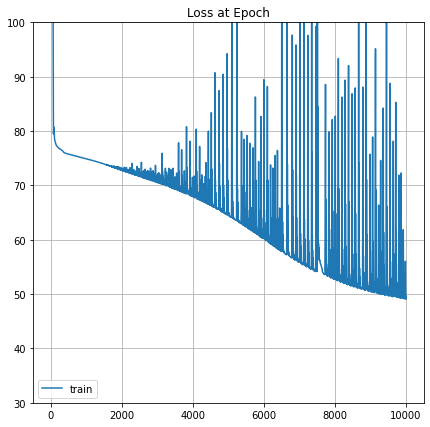

In [16]:
plot(plt_los , [30.0, 100.0], title='Loss at Epoch')

In [17]:
model.eval()
with torch.no_grad():
    y_pred = model(x_test)

In [22]:
sample['hash-rate'] = y_pred.cpu().numpy()
sample.to_csv('submission.csv',index=False)

In [24]:
sample

,index,hash-rate
0,746,123.381737
1,56,37.215561
2,684,120.942337
3,896,172.134323
4,723,132.714828
...,...,...
213,1043,129.407806
214,661,119.163712
215,894,164.930817
216,828,157.163788
